In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path("Resources/Operations Analyst - Intake Assessment Datafile (1).csv")
data_df = pd.read_csv(data)

#Display the DataFrame
data_df.head()

,Service Point ID,Unit of Measure,Interval Length (Seconds),Start Time,End Time,Count,0:15,0:30,0:45,1:00,...,22:45,23:00,23:15,23:30,23:45,0:00,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,9999999999,kWh,900,2022-01-01T00:00-08:00,2022-01-02T00:00-08:00,96,1.08,1.44,1.08,1.08,...,0.72,1.08,1.08,1.08,1.08,1.08,NaN,NaN,NaN,NaN
1,9999999999,kWh,900,2022-01-02T00:00-08:00,2022-01-03T00:00-08:00,96,0.72,1.08,1.08,1.08,...,1.08,1.08,0.72,1.08,1.08,1.08,NaN,NaN,NaN,NaN
2,9999999999,kWh,900,2022-01-03T00:00-08:00,2022-01-04T00:00-08:00,96,0.72,1.08,1.08,1.08,...,1.08,0.72,1.08,1.08,1.08,1.08,NaN,NaN,NaN,NaN
3,9999999999,kWh,900,2022-01-04T00:00-08:00,2022-01-05T00:00-08:00,96,1.08,1.08,1.08,1.08,...,1.08,0.72,1.08,0.72,1.08,0.72,NaN,NaN,NaN,NaN
4,9999999999,kWh,900,2022-01-05T00:00-08:00,2022-01-06T00:00-08:00,96,1.08,0.72,1.08,0.72,...,8.64,9.00,9.00,9.00,9.00,9.00,NaN,NaN,NaN,NaN


In [3]:
cleaned_data_df= data_df.drop(columns=['Unnamed: 102',
       'Unnamed: 103', 'Unnamed: 104', 'Unnamed: 105'])

In [4]:
# Melt the data to reshape it into a time-series
df = pd.melt(cleaned_data_df, id_vars=["Service Point ID", "Unit of Measure", "Interval Length (Seconds)", "Start Time", "End Time", "Count"],
             var_name="Time", value_name="Load_kWh")


In [5]:
# Convert the "Time" column to a datetime object and set it as the index
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M")
df["Date_Time"] = pd.to_datetime(df["Start Time"]) + pd.to_timedelta(df["Time"].dt.strftime("%H:%M:%S"))
df = df.set_index("Date_Time")

C:\Users\mohamed.bensaidani\AppData\Local\Temp\ipykernel_4768\1952131534.py:3: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df["Date_Time"] = pd.to_datetime(df["Start Time"]) + pd.to_timedelta(df["Time"].dt.strftime("%H:%M:%S"))


In [6]:
# Drop the unnecessary columns and reset the index
df = df.drop(["Service Point ID", "Unit of Measure", "Interval Length (Seconds)", "Start Time", "End Time", "Count", "Time"], axis=1)
df = df.reset_index()

In [7]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], utc=True)

In [8]:
# Save the resulting dataset as a csv file
df.to_csv("electricity_data.csv", index=False)

In [9]:
# Load the transformed data
df = pd.read_csv("electricity_data.csv", parse_dates=["Date_Time"])

In [10]:
df

,Date_Time,Load_kWh
0,2022-01-01 08:15:00+00:00,1.08
1,2022-01-02 08:15:00+00:00,0.72
2,2022-01-03 08:15:00+00:00,0.72
3,2022-01-04 08:15:00+00:00,1.08
4,2022-01-05 08:15:00+00:00,1.08
...,...,...
34939,2022-12-27 08:00:00+00:00,9.72
34940,2022-12-28 08:00:00+00:00,9.72
34941,2022-12-29 08:00:00+00:00,9.72
34942,2022-12-30 08:00:00+00:00,18.00


In [11]:
# To list the ten weekdays prior to 7/21/2022, we can use the pandas date_range function :
start_weekdays = pd.to_datetime('2022-07-21') - pd.DateOffset(days=16)
end_weekdays = pd.to_datetime('2022-07-21')

date_range = pd.date_range(start=start_weekdays, end=end_weekdays, freq='B')

weekdays = date_range[date_range.weekday < 5][-10:]

print(weekdays)

DatetimeIndex(['2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13',
               '2022-07-14', '2022-07-15', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21'],
              dtype='datetime64[ns]', freq='B')


In [12]:
# To list the 5 weekends prior to 09/10/2022, we can use the pandas date_range function :
start_weekends = pd.to_datetime('2022-09-10') - pd.DateOffset(days=16)
end_weekends = pd.to_datetime('2022-09-10')

date_range = pd.date_range(start=start_weekends, end=end_weekends, freq='D')

weekends = date_range[date_range.weekday >= 5][:5]

print(weekends)

DatetimeIndex(['2022-08-27', '2022-08-28', '2022-09-03', '2022-09-04',
               '2022-09-10'],
              dtype='datetime64[ns]', freq=None)


In [13]:
# Filter the data to the relevant periods
weekday_start = pd.to_datetime("2022-07-06 00:00:00-07:00")
weekday_end = pd.to_datetime("2022-07-21 23:45:00-07:00")
weekend_start = pd.to_datetime("2022-09-04 00:00:00-07:00")
weekend_end = pd.to_datetime("2022-09-09 23:45:00-07:00")

weekday_data = df[(df["Date_Time"] >= weekday_start) & (df["Date_Time"] <= weekday_end)]
weekend_data = df[(df["Date_Time"] >= weekend_start) & (df["Date_Time"] <= weekend_end)]

# # Calculate the average hourly usage during the weekdays
weekday_data["Hour"] = weekday_data["Date_Time"].dt.hour
weekday_hourly_usage = weekday_data.groupby("Hour")["Load_kWh"].mean()
weekday_hourly_usage = weekday_hourly_usage.rename("Weekday Average Hourly Usage")

# Calculate the average hourly usage during the weekend
weekend_data["Hour"] = weekend_data["Date_Time"].dt.hour
weekend_hourly_usage = weekend_data.groupby("Hour")["Load_kWh"].mean()
weekend_hourly_usage = weekend_hourly_usage.rename("Weekend Average Hourly Usage")

# Combine the results into a single dataframe and save it as a csv file
hourly_usage = pd.concat([weekday_hourly_usage, weekend_hourly_usage], axis=1)

C:\Users\mohamed.bensaidani\AppData\Local\Temp\ipykernel_4768\3297087048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data["Hour"] = weekday_data["Date_Time"].dt.hour
C:\Users\mohamed.bensaidani\AppData\Local\Temp\ipykernel_4768\3297087048.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data["Hour"] = weekend_data["Date_Time"].dt.hour


In [14]:
hourly_usage

,Weekday Average Hourly Usage,Weekend Average Hourly Usage
Hour,,
0,82.108125,152.985
1,70.374375,144.900
2,59.118750,118.935
3,61.335000,105.960
4,80.049375,81.855
5,87.603750,75.930
6,77.557500,70.935
7,70.396875,73.110
8,70.878000,75.225


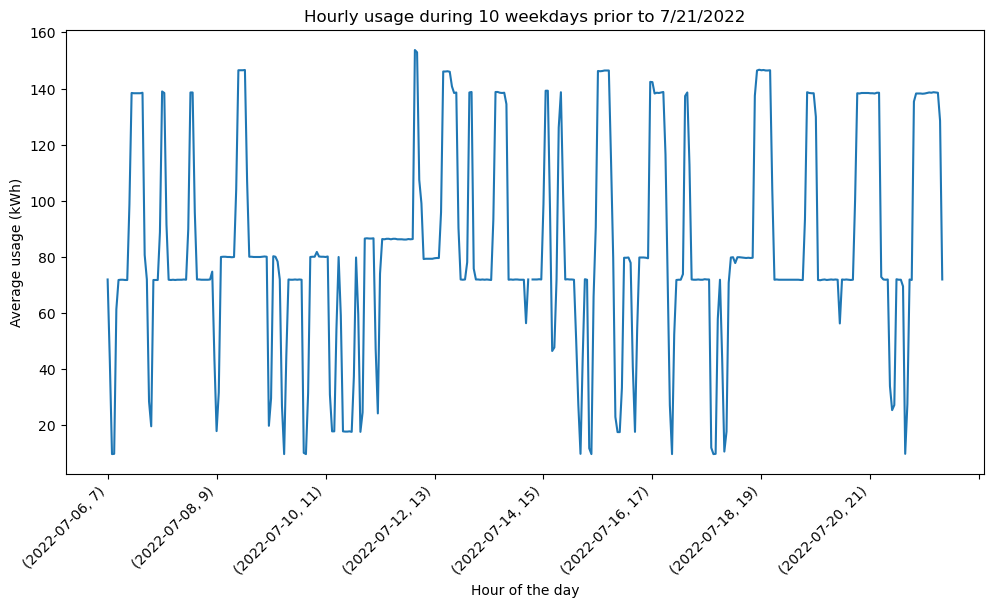

In [15]:
# Create a line plot of hourly usage for each day during the period
fig, ax = plt.subplots(figsize=(10, 6))
weekday_data.groupby([weekday_data['Date_Time'].dt.date, weekday_data['Date_Time'].dt.hour])['Load_kWh'].mean().plot(ax=ax)
ax.set_xlabel('Hour of the day')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align to the right
plt.tight_layout()  # Adjust spacing between x-axis labels
ax.set_ylabel('Average usage (kWh)')
ax.set_title('Hourly usage during 10 weekdays prior to 7/21/2022')
plt.show()